# Aim: Predict football players' positions given their attributes.

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib as mp
from sklearn.decomposition import *
import statistics as st

# Loading and Cleaning Data

In [2]:
conn = sqlite3.connect("football/database.sqlite")

In [3]:
cur = conn.cursor()
cur.execute("select * from player_attributes")
d=pd.DataFrame(cur.fetchall())
d.dropna(axis=0, inplace=True)

# Retrieving relevent player attributes

In [4]:
dtr=d[[10,12,17,34,35,36,37,38,40,41]]
dtr.columns=["Finishing", "Short Passing", "Long Passing", "Marking", "Standing Tackle", "Sliding Tackle", "Diving", "Handling", "Positioning", "Reflexes"]
dtr.head()

,Finishing,Short Passing,Long Passing,Marking,Standing Tackle,Sliding Tackle,Diving,Handling,Positioning,Reflexes
0,44.0,61.0,64.0,65.0,69.0,69.0,6.0,11.0,8.0,8.0
1,44.0,61.0,64.0,65.0,69.0,69.0,6.0,11.0,8.0,8.0
2,44.0,61.0,64.0,65.0,66.0,69.0,6.0,11.0,8.0,8.0
3,43.0,60.0,63.0,62.0,63.0,66.0,5.0,10.0,7.0,7.0
4,43.0,60.0,63.0,62.0,63.0,66.0,5.0,10.0,7.0,7.0


# Train Test Split on a random sample

In [5]:
from sklearn.model_selection import *
dtr1 = dtr.sample(2500, random_state=12)
Xtr, Xtest = train_test_split(dtr1, random_state=12)

# KMeans 

__We would prefer Cosine distance here because we are more interested in the distribution of attributes of players rather than the value of the attributes itself. For that, we normalize the vectors, which would make their Euclidean Distance have a linear relationship with Cosine distance.__ 

In [7]:
from sklearn import preprocessing
from sklearn.cluster import *
xn1= preprocessing.normalize(Xtr)
kmeans = KMeans(n_clusters=4, random_state=12)
kmeans.fit(xn1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=12, tol=0.0001, verbose=0)

# Testing with players and finding out which labels are what

In [9]:
print(" Strikers are labelled: {} \n Midfielders are labelled: {} \n Defenders are labelled: {} \n Goalkeepers are labelled: {}".format(st.mode(kmeans.predict(Xtr.loc[Xtr['Finishing']>=85])), st.mode(kmeans.predict(Xtr.loc[Xtr['Short Passing']>=85])), st.mode(kmeans.predict(Xtr.loc[Xtr['Sliding Tackle']>=85])), st.mode(kmeans.predict(Xtr.loc[Xtr['Diving']>=85]))))

 Strikers are labelled: 3 
 Midfielders are labelled: 0 
 Defenders are labelled: 2 
 Goalkeepers are labelled: 1


# Visualize Results using TSNE

In [11]:
from sklearn.manifold import *
from sklearn.cluster import *
tsne = TSNE(n_components=2, random_state=12, metric='cosine').fit_transform(xn1)

ready


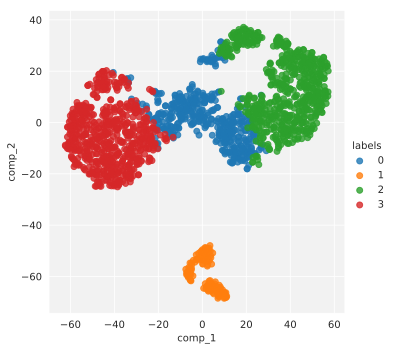

In [12]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'
mp.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(tsne)
proj.columns = ["comp_1", "comp_2"]
proj['labels']=kmeans.labels_
sns.lmplot("comp_1", "comp_2", hue='labels', data = proj,fit_reg=False)
print("ready")

__The bordering areas will have players like defensive midfielders and creative strikers. As you can see, midfielders tend to have some characteritics of defenders and strikers. Hence they border both clusters.__

# Testing with players from test data

In [10]:
print(" Strikers are labelled: {} \n Midfielders are labelled: {} \n Defenders are labelled: {} \n Goalkeepers are labelled: {}".format(st.mode(kmeans.predict(Xtest.loc[Xtest['Finishing']>=85])), st.mode(kmeans.predict(Xtest.loc[Xtest['Short Passing']>=85])), st.mode(kmeans.predict(Xtest.loc[Xtest['Sliding Tackle']>=85])), st.mode(kmeans.predict(Xtest.loc[Xtest['Diving']>=75]))))

 Strikers are labelled: 3 
 Midfielders are labelled: 0 
 Defenders are labelled: 2 
 Goalkeepers are labelled: 1


__We can see that test data also has the same labels.__